# 1. Social Network Analysis with NetworkX in Python


 - Networkx란? 그래프와 네트워크 연구를 위한 파이썬 라이브러리

In [50]:
# 패키지 불러오기 
# Matplotlib는 라인 플롯, 바 차트, 파이차트, 히스토그램, Box Plot, Scatter Plot 등을 비롯하여 다양한 차트와 플롯 스타일을 지원
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

## 1.1 Social Network Basics
 - 각 네트워크는 노드와 링크로 구성됨.
### 1.1.1 Symmetric Networks (undirected)
 -  “working together”관계의 인물들로 구성됨, A 와 B 관계가 서로 대칭적


In [2]:
G_symmetric = nx.Graph()

G_symmetric.add_edge('Steven',  'Laura')
G_symmetric.add_edge('Steven',  'Marc')
G_symmetric.add_edge('Steven',  'John')
G_symmetric.add_edge('Steven',  'Michelle')
G_symmetric.add_edge('Laura',   'Michelle')
G_symmetric.add_edge('Michelle','Marc')
G_symmetric.add_edge('George',  'John')
G_symmetric.add_edge('George',  'Steven')

In [52]:
print(nx.info(G_symmetric))
#네트워크 기본정보

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 8
Average degree:   2.6667


 - draw_networkx 를 이용하여 시각화하기

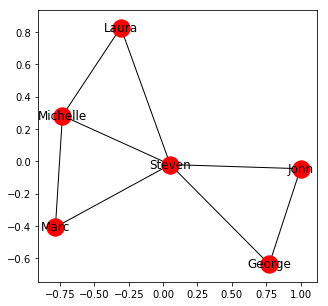

In [4]:
plt.figure(figsize=(5,5))
nx.draw_networkx(G_symmetric);

### 1.1.2 Asymmetric Networks (directed)
 - 만약 이 노드 간 관계가 직장 동료가 아닌 부모-자녀의 관계라면 비대칭적 관계가 됨.
    A의 자녀가 B라면, B는 A의 부모가 될 수 없음.

In [55]:
#비대칭적 네트워크 만들기
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')

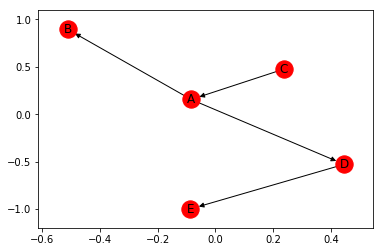

In [6]:
# 모든 노드를 네트워크에 명확히 표시
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)

### 1.1.3 Weighted Networks
 - 네트워크에 가중치 추가하기

In [7]:
G_weighted = nx.Graph()

G_weighted.add_edge('Steven',  'Laura',   weight=25)
G_weighted.add_edge('Steven',  'Marc',    weight=8)
G_weighted.add_edge('Steven',  'John',    weight=11)
G_weighted.add_edge('Steven',  'Michelle',weight=1)
G_weighted.add_edge('Laura',   'Michelle',weight=1)
G_weighted.add_edge('Michelle','Marc',    weight=1)
G_weighted.add_edge('George',  'John',    weight=8)
G_weighted.add_edge('George',  'Steven',  weight=4)

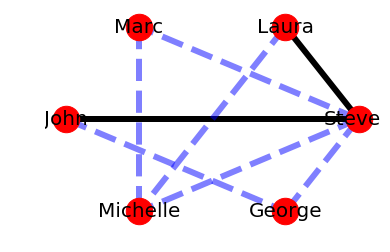

In [8]:
elarge = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] > 8]
esmall = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] <= 8]

pos = nx.circular_layout(G_weighted)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G_weighted, pos, node_size=700)

# edges
nx.draw_networkx_edges(G_weighted, pos, edgelist=elarge,width=6)
nx.draw_networkx_edges(G_weighted, pos, edgelist=esmall,width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G_weighted, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show();

## 1.2 Clustering coefficient
 - 소셜 네트워크에서 클러스터를 형성하는 경우

In [9]:
nx.clustering(G_symmetric,'Michelle')


0.6666666666666666

In [10]:
nx.clustering(G_symmetric,'Laura')


1.0

In [11]:
nx.average_clustering(G_symmetric)


0.8277777777777778

 - Michelle의 로컬 클러스터링 계수는 0.67이고 Laura의 로컬 클러스터링 계수는 1이다.
 - 평균 클러스터링 계수 (모든 로컬 클러스터링 계수의 합계를 노드 수로 나눈 값)는 0.867이다.

## 1.3 Network Distance Measures
### 1.3.1. Degree
 - 노드의 정도는 노드의 연결 수를 뜻함. 

In [12]:
nx.degree(G_symmetric, 'Michelle')


3

 - 미셸이 네트워크에서 3명의 직원과 함께 작업했으므로 "3"

### 1.3.2.Distance
 - 두 노드간의 최단경로와 해당길이 파악가능.

In [13]:
nx.shortest_path(G_symmetric, 'Michelle', 'John')


['Michelle', 'Steven', 'John']

In [14]:
nx.shortest_path_length(G_symmetric, 'Michelle', 'John')


2

### 1.3.3. Breadth-first search
 - 폭 우선 검색 알고리즘을 사용하여 네트워크의 다른 모든 노드에서 노드까지의 거리를 찾을 수 있다.

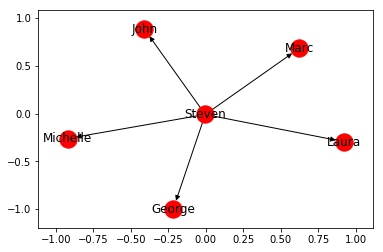

In [15]:
S = nx.bfs_tree(G_symmetric, 'Steven')
nx.draw_networkx(S)

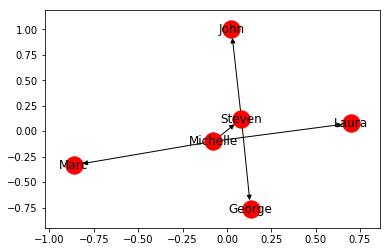

In [16]:
M = nx.bfs_tree(G_symmetric, 'Michelle')
nx.draw_networkx(M)

### 1.3.4. Eccentricity


In [17]:
nx.eccentricity(G_symmetric,'Michelle')


2

In [18]:
nx.eccentricity(G_symmetric,'Steven')

1

## 1.4 Centrality measures
 - 네트워크에서 가장 중요한 노드를 찾는 방법.(중심성 측정)
    가장 인기있고 영향력있는 사람 식별 가능.
    

### 1.4.1. Degree Centrality
 - 중요한 노드에는 많은 링크가 있다는 사실을 기반으로 연결 수를 측정

In [19]:
nx.degree_centrality(G_symmetric)

{'Steven': 1.0,
 'Laura': 0.4,
 'Marc': 0.4,
 'John': 0.4,
 'Michelle': 0.6000000000000001,
 'George': 0.4}

### 1.4.2. Eigenvector Centrality
 - 다른 중요한 노드에 얼마나 잘 연결되어 있는지 고려, 중심성 계산가능

In [20]:
nx.eigenvector_centrality(G_symmetric)

{'Steven': 0.6006686104947806,
 'Laura': 0.3545677660798074,
 'Marc': 0.3545677660798074,
 'John': 0.30844592433424667,
 'Michelle': 0.4443904166426225,
 'George': 0.30844592433424667}

## 1.4.3. Closeness Centrality
 - 다른 모든 노드에 대한 근접성 척도

In [21]:
nx.closeness_centrality(G_symmetric)

{'Steven': 1.0,
 'Laura': 0.625,
 'Marc': 0.625,
 'John': 0.625,
 'Michelle': 0.7142857142857143,
 'George': 0.625}

### 1.4.4. Betweenness Centrality

In [22]:
nx.betweenness_centrality(G_symmetric)


{'Steven': 0.65,
 'Laura': 0.0,
 'Marc': 0.0,
 'John': 0.0,
 'Michelle': 0.05,
 'George': 0.0}

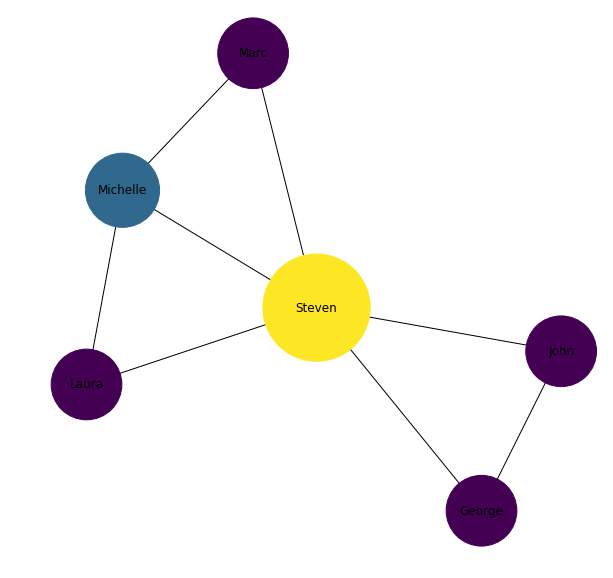

In [23]:
pos = nx.spring_layout(G_symmetric)
betCent = nx.betweenness_centrality(G_symmetric, normalized=True, endpoints=True)
node_color = [20000.0 * G_symmetric.degree(v) for v in G_symmetric]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(G_symmetric, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

In [24]:
sorted(betCent, key=betCent.get, reverse=True)[:5]


['Steven', 'Michelle', 'Laura', 'Marc', 'John']

## 1.5 Facebook Case Study


 -  facebook_combined.txt 파일 다운로드 후 그래프 구성해봄.

In [37]:
import pandas as pd


In [38]:
df = pd.read_csv('/Users/ziyoo/Downloads/facebook_combined.txt')


In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88233 entries, 0 to 88232
Data columns (total 1 columns):
0 1    88233 non-null object
dtypes: object(1)
memory usage: 689.4+ KB


In [40]:
df.tail()


,0 1
88228,4026 4030
88229,4027 4031
88230,4027 4032
88231,4027 4038
88232,4031 4038


In [41]:
G_fb = nx.read_edgelist("/Users/ziyoo/Downloads/facebook_combined.txt", create_using = nx.Graph(), nodetype=int)


In [44]:
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


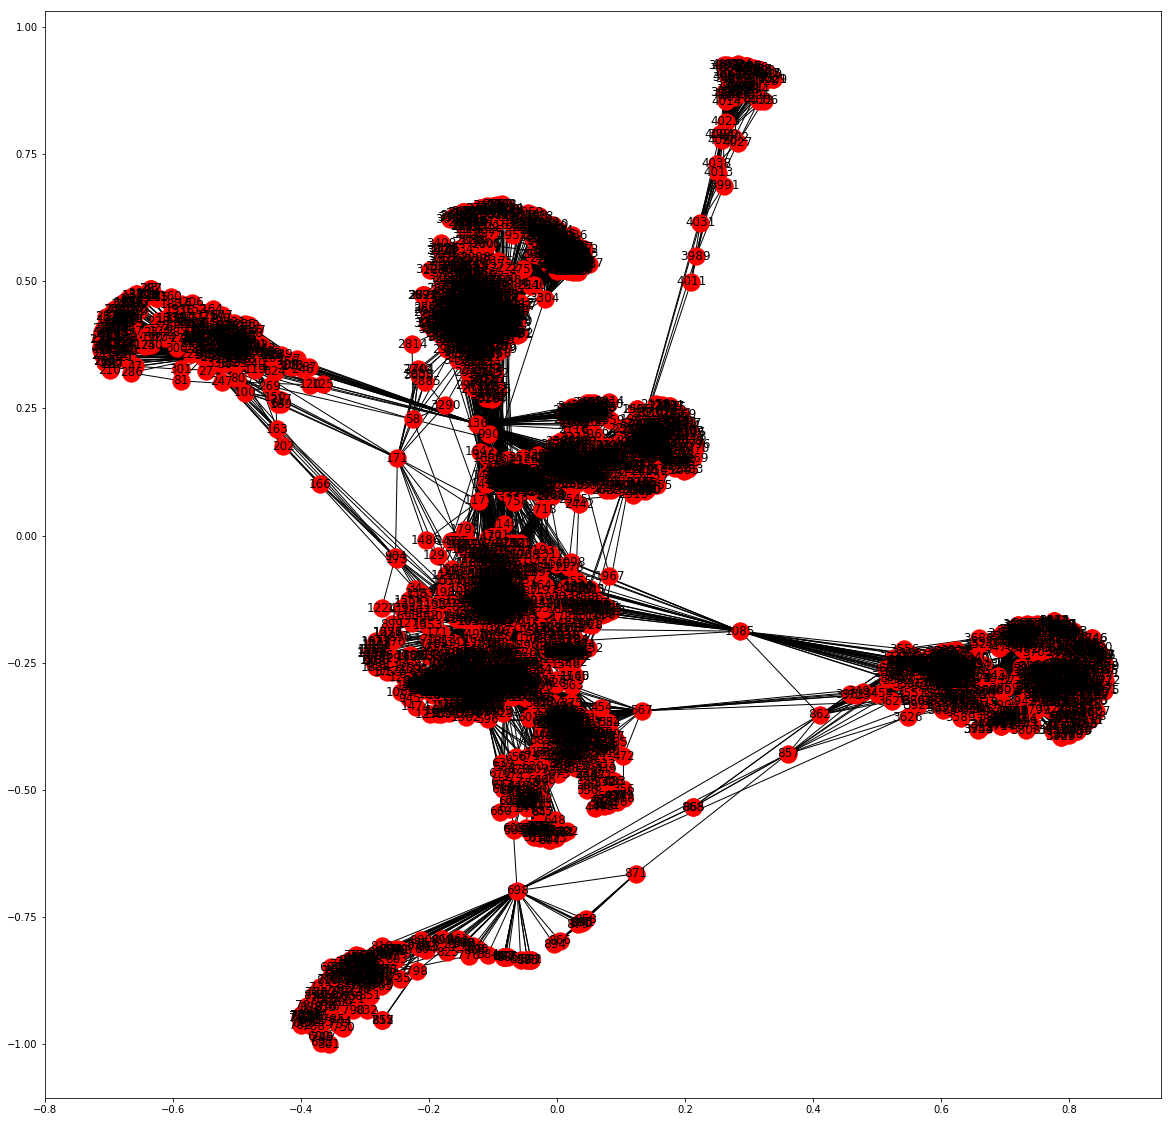

In [46]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb);

 - Betweenness Centrality를 사용하여 노드 색상이 Degree 및 노드 크기에 따라 달라 지도록 네트워크를 시각화 할 수 있다.

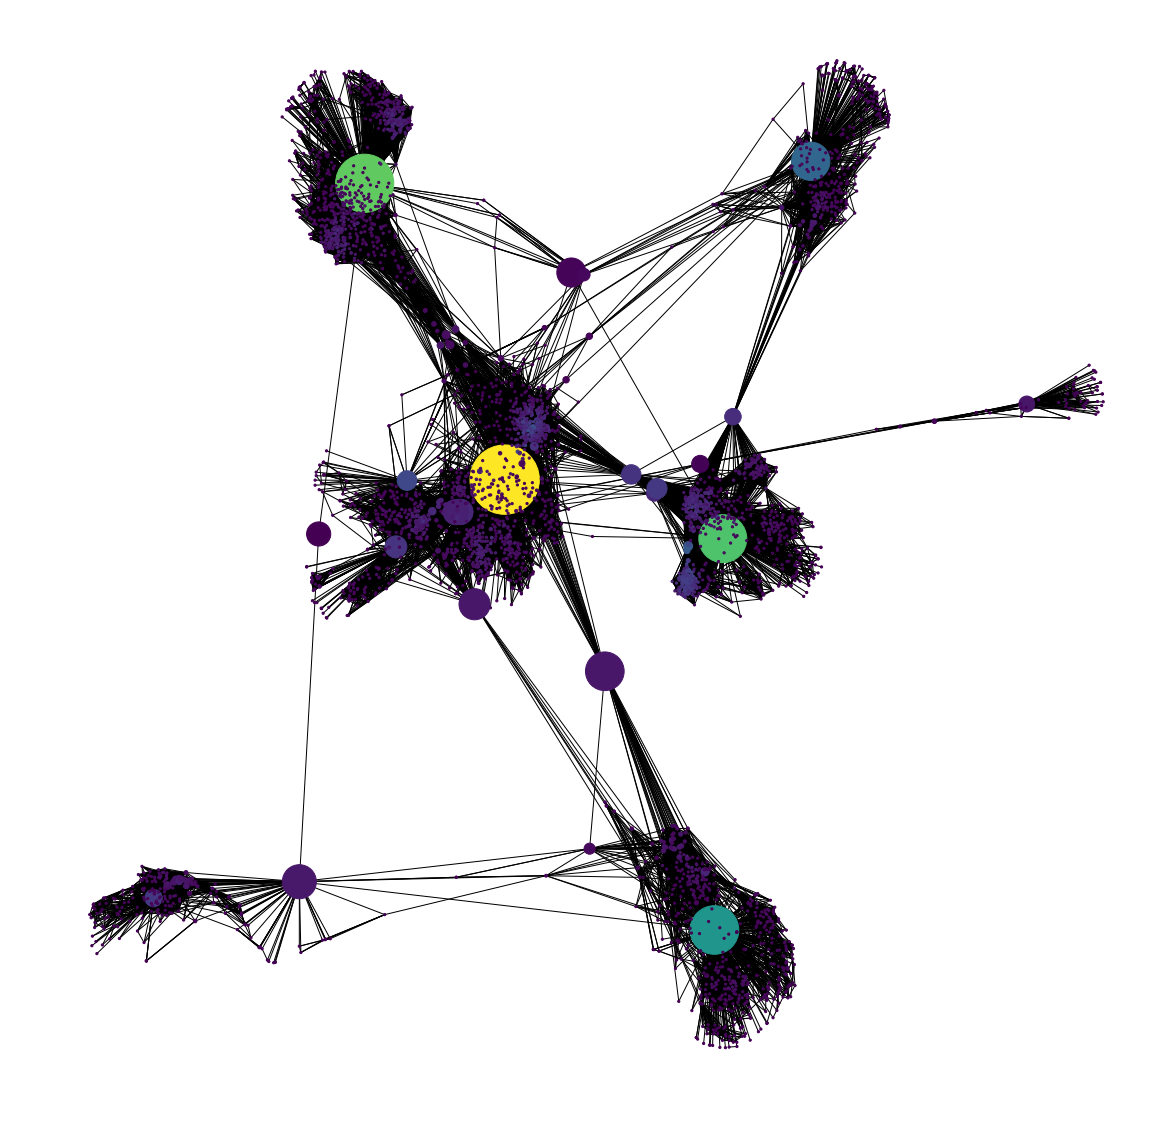

In [47]:
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

 - 중심성이 가장 높은 노드의 레이블을 알 수도 있다.

In [48]:
sorted(betCent, key=betCent.get, reverse=True)[:5]


[107, 1684, 3437, 1912, 1085]

 - 노드 1912의 중요성 파악가능